# Homework 3

## Exercise 1

**Master method.**

**Case 1:** $A(n) = 4A(n / 2) + n$.  
$a = 4, b = 2 \implies n^{\log_b a} = n^2; f(n) = n$.  
$f(n) = O(n^{2 - \epsilon})$ for $\epsilon = 1$.  
$A(n) = \Theta(n^2)$.

**Case 2:** $B(n) = 2B(n / 2) + n$.  
$a = 2, b = 2 \implies n^{\log_b a} = n; f(n) = n$.  
$f(n) = \Theta(n \lg^0 n)$, that is, $k = 0$.  
$B(n) = \Theta(n \lg n)$.

**Case 3:** $C(n) = 2C(n / 4) + n$.  
$a = 2, b = 4 \implies n^{\log_b a} = n^{-1}; f(n) = n$.  
$f(n) = \Omega(n^{-1 + \epsilon})$ for $\epsilon = 2$,  
and  
$2(n / 4) \leq cn$ (reg.cond.) for $c = \frac{1}{2}$.  
$C(n) = \Theta(n)$.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [5]:
def A(n):
    if n == 1:
        return 1
    return 4 * A(math.ceil(n / 2)) + n


def B(n):
    if n == 1:
        return 1
    return 2 * B(math.ceil(n / 2)) + n

def C(n):
    if n == 1:
        return 1
    return 2 * C(math.ceil(n / 4)) + n

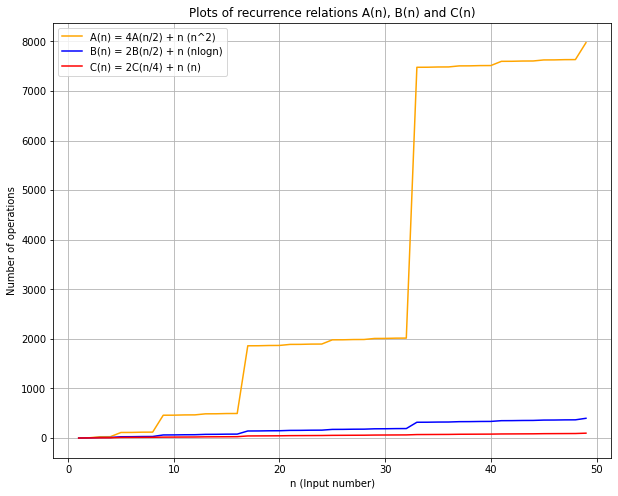

In [25]:
N = range(1, 50)

plt.rcParams["figure.figsize"] = (10,8)

plt.plot(N, [A(n) for n in N], 'orange', label='A(n) = 4A(n/2) + n (n^2)')
plt.plot(N, [B(n) for n in N], 'blue', label='B(n) = 2B(n/2) + n (nlogn)')
plt.plot(N, [C(n) for n in N], 'red', label='C(n) = 2C(n/4) + n (n)')

plt.legend()
plt.grid(True)
plt.xlabel('n (Input number)')
plt.ylabel('Number of operations')
plt.title('Plots of recurrence relations A(n), B(n) and C(n)')

plt.show()

## Exercise 2

Using the Master Theorem is not allowed if T(n) is not monotone. Our recurrence relation is $D(n) = D(n / 2) + \frac{n}{2}(\sin(\frac{n}{2} - \frac{\pi}{2}) + 2)$, or rewritten $D(n) = D(n / 2) + \frac{n}{2}(2 - \cos(n))$. As far as the cosine function is not monotone, the whole $f(n) = \frac{n}{2}(2 - \cos(n))$ is not monotone too. We may conclude that $D(n)$ is not monotone, let's build a plot and make sure.

In [18]:
def D(n):
    if n <= 1:
        return 1
    return D(n / 2) + n * (math.sin(n - math.pi / 2) + 2)

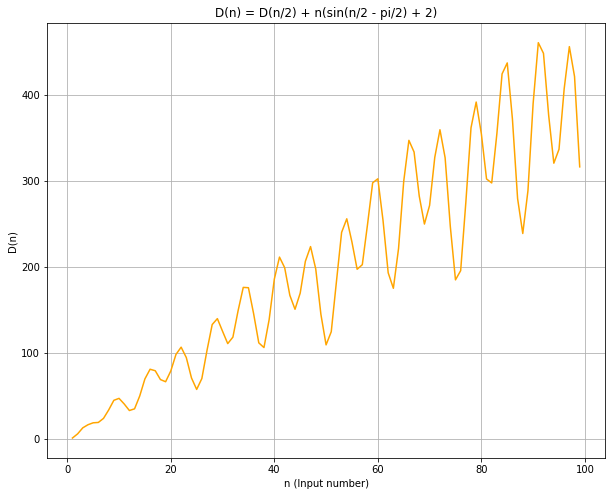

In [26]:
N = range(1, 100)

plt.rcParams["figure.figsize"] = (10,8)

plt.plot(N, [D(n) for n in N], 'orange')

plt.grid(True)
plt.xlabel('n (Input number)')
plt.ylabel('D(n)')
plt.title('D(n) = D(n/2) + n(sin(n/2 - pi/2) + 2)')

plt.show()

Now, that we see the non-monotonic nature of $D(n)$, we sum up that the Master Theorem cannot be applied. Let's try to provide some upper and lower bounds for asymptotic comlexity. Since $-1 \leq \cos(n) \leq 1$, we can consider the following recurrence relations as bounds:  
* upper bound: $D_{low}(n) = D_{low}(n / 2) + \frac{1}{2}n$
* lower bound: $D_{up}(n) = D_{up}(n / 2) + \frac{3}{2}n$  
  
Using the Master Theorem (Case 3), we get that $D_{low}(n) = \Theta(n)$ and $D_{up}(n) = \Theta(n)$. So $D(n)$ can be limited by some linear functions. Let's choose $f_1(n) = n$ and $f_2(n) = 7n$ and plot the results.

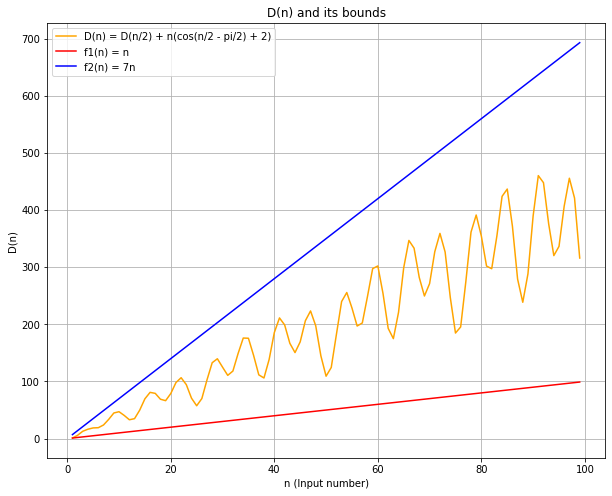

In [27]:
N = range(1, 100)

plt.rcParams["figure.figsize"] = (10,8)

plt.plot(N, [D(n) for n in N], 'orange', label='D(n) = D(n/2) + n(cos(n/2 - pi/2) + 2)')
plt.plot(N, [n for n in N], 'red', label='f1(n) = n')
plt.plot(N, [7 * n for n in N], 'blue', label='f2(n) = 7n')

plt.legend()
plt.grid(True)
plt.xlabel('n (Input number)')
plt.ylabel('D(n)')
plt.title('D(n) and its bounds')

plt.show()

## Exercise 3

Let's implement **radix sort** and compare it with a built-in one. Radix sort is a non-comparative sorting algorithm with time complexity of $O(wn)$, where $n$ is the array size, and $w$ is the maximum number of digits. It successively sorts the numbers by digits of same radix from the least significant to the most significant digits of the numbers. The subroutine for radix sort is comparison sort, which sorts digits in base $b$ for linear time.

In [33]:
import random
from time import perf_counter as timer

In [34]:
def counting_sort_exp(array, exponent, base):
    n = len(array)
    result = [0] * n
    counts = [0] * base
 
    for i in range(0, n):
        index = array[i] // exponent
        counts[index % base] += 1
 
    for i in range(1, base):
        counts[i] += counts[i - 1]
 
    i = n - 1
    while i >= 0:
        index = array[i] // exponent
        result[counts[index % base] - 1] = array[i]
        counts[index % base] -= 1
        i -= 1
 
    return result

In [35]:
def radix_sort(array, base=10):
    result = array
    M = max(array)
    exponent = 1
    
    while M / exponent >= 1:
        result = counting_sort_exp(result, exponent, base)
        exponent *= base
        
    return result

In [36]:
def generate_random_int_array(size, min_, max_):
    array = [0] * size
    
    for i in range (size):
        array[i] = random.randint(min_, max_)
    
    return array

In [37]:
def benchmark(sorting, array_sizes, max_int, n_repeats=1):
    results = []
    
    for size in array_sizes:
        average = 0
        
        for _ in range(n_repeats):
            array = generate_random_int_array(size, 0, max_int)

            start = timer()
            sorting(array)
            end = timer()
        
            average += (end - start) / n_repeats
        
        results.append(average)
        
    return results

In [38]:
n_measures = 50
n_repeats = 3
sizes = [(1000 + i * 500) for i in range(n_measures)]

built_in_8bit = benchmark(sorted, sizes, 2 ** 8, n_repeats)
radix_8bit = benchmark(radix_sort, sizes, 2 ** 8, n_repeats)

built_in_32bit = benchmark(sorted, sizes, 2 ** 32, n_repeats)
radix_32bit = benchmark(radix_sort, sizes, 2 ** 32, n_repeats)

built_in_64bit = benchmark(sorted, sizes, 2 ** 64, n_repeats)
radix_64bit = benchmark(radix_sort, sizes, 2 ** 64, n_repeats)

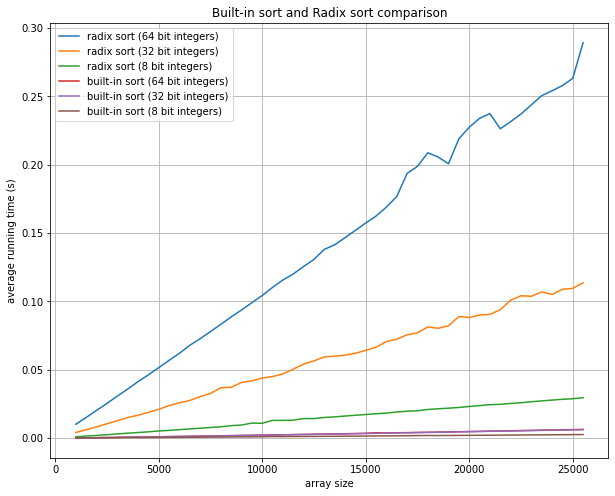

In [40]:
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(sizes, radix_64bit, label='radix sort (64 bit integers)')
plt.plot(sizes, radix_32bit, label='radix sort (32 bit integers)')
plt.plot(sizes, radix_8bit, label='radix sort (8 bit integers)')

plt.plot(sizes, built_in_64bit, label='built-in sort (64 bit integers)')
plt.plot(sizes, built_in_32bit, label='built-in sort (32 bit integers)')
plt.plot(sizes, built_in_8bit, label='built-in sort (8 bit integers)')

plt.legend()
plt.grid(True)
plt.xlabel('array size')
plt.ylabel('average running time (s)')
plt.title('Built-in sort and Radix sort comparison')

plt.show()

The built-in sort is much faster than the radix one. The plots of both show linear dependence of mean running time over array size. Increasing the number of digits in integer makes the slopes of the plots steeper. It means that the build-in sorting algorithm also somehow depends on integers size. Let's compare the slopes:

In [84]:
print(f"The built-in sort is faster than radix sort in {round(radix_8bit[30] / built_in_8bit[30], 2)} times on 8-bit integers.")
print(f"The built-in sort is faster than radix sort in {round(radix_32bit[30] / built_in_32bit[30], 2)} times on 32-bit integers.")
print(f"The built-in sort is faster than radix sort in {round(radix_64bit[30] / built_in_64bit[30], 2)} times on 64-bit integers.")

The built-in sort is faster than radix sort in 11.07 times on 8-bit integers.
The built-in sort is faster than radix sort in 19.25 times on 32-bit integers.
The built-in sort is faster than radix sort in 44.81 times on 64-bit integers.


We see (which is theoretically plausible) that the more digits the numbers have, the slower is the radix sort compared to the built-in one.

## Exercise 4-5

To compete with the built-in sorting algorithm, we implement **bucket sort** with the following assumptions/tricks:  
* the sorted data is an array of uniformly distributed floats in range [0, 1)
* the number of buckets is determined by the array size multiplied by some hand-picked constant factor
* the sorting of buckets is executed by multiple processes using **multiprocessing** module

In [100]:
import inspect
import multiprocessing

In [101]:
def insertion_sort(array):
    if len(array) == 0:
        return array
    
    for i in range(1, len(array)):
        current = array[i]
        j = i - 1
        
        while j >= 0 and array[j] > current: 
            array[j + 1] = array[j]
            j -= 1
            
        array[j + 1] = current
        
    return array

The feature of using the multiprocessing module in Jupyter Notebook is that the function, executed by processes, should be imported externally.

In [102]:
with open(f"./tmp_func.py", 'w') as file:
            file.write(inspect.getsource(insertion_sort).replace(insertion_sort.__name__, "task"))
from tmp_func import task

In [103]:
def bucket_sort(array, n_buckets, n_processes=1):
    buckets = []
    
    for _ in range(n_buckets):
        buckets.append([])
          
    for x in array:
        index = int((n_buckets - 1) * x)
        buckets[index].append(x)
    
    if n_processes == 1:
        # in case of single process, we don't create pool in order to save time
        buckets_sorted = list(map(insertion_sort, buckets))
    else:
        # create process pool and distribute buckets' sorting between the processes
        with multiprocessing.Pool(n_processes) as pool:
            buckets_sorted = pool.map(task, buckets)
    
    return np.concatenate(buckets_sorted)

Neither radix sort nor counting sort cannot sort floats, therefore we compare the multiprocessed bucket sort with the usual single-processed.

In [104]:
def generate_random_float_array(size):
    array = [0] * size
    
    for i in range (size):
        array[i] = random.random()
    
    return array

In [105]:
n_measures = 10
array_sizes = [1_000_000 * (i + 1) for i in range(n_measures)]

built_in_res = [0] * n_measures
bucket_res = [0] * n_measures
bucket_multiprocessed_res = [0] * n_measures

for i in range(n_measures):
    array = generate_random_float_array(array_sizes[i])
    
    start = timer()
    sorted(array)
    end = timer()
    built_in_res[i] = end - start
    
    start = timer()
    bucket_sort(array, array_sizes[i] // 30)
    end = timer()
    bucket_res[i] = end - start
    
    start = timer()
    bucket_sort(array, array_sizes[i] // 30, n_processes=4)
    end = timer()
    bucket_multiprocessed_res[i] = end - start

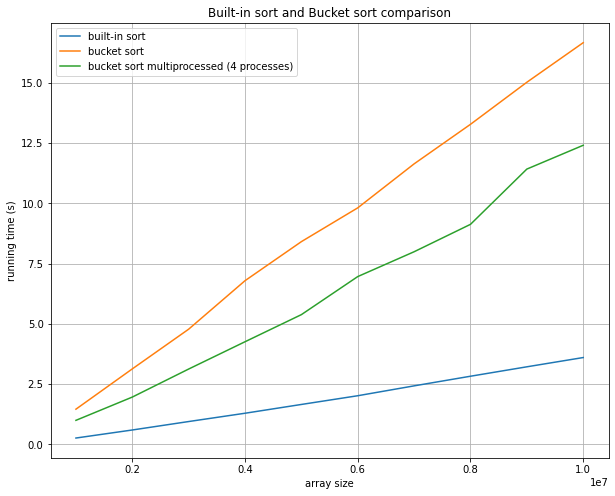

In [106]:
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(array_sizes, built_in_res, label='built-in sort')
plt.plot(array_sizes, bucket_res, label='bucket sort')
plt.plot(array_sizes, bucket_multiprocessed_res, label='bucket sort multiprocessed (4 processes)')

plt.legend()
plt.grid(True)
plt.xlabel('array size')
plt.ylabel('running time (s)')
plt.title('Built-in sort and Bucket sort comparison')

plt.show()

Unfortunately, we didn't manage to prevail the built-in sorting algorithm, but we approached quite close and achieved boost in speed compared to the usual bucket sort.

In [108]:
print(f"The built-in sort is faster than the multiprocessed bucket sort in {round(bucket_multiprocessed_res[7] / built_in_res[7], 2)} times.")
print(f"The multiprocessed bucket sort is faster than the single-processed one in {round(bucket_res[7] / bucket_multiprocessed_res[7], 2)} times.")

The built-in sort is faster than the multiprocessed bucket sort in 3.23 times.
The multiprocessed bucket sort is faster than the single-processed one in 1.45 times.


## Exercise 7

In order to find the nearest pair of points in $O(n \log n)$ time, we:  
* sort all the points with merge sort ($O(n \log n)$ time)
* calculate distances between adjacent points ($O(n)$ time)
* find pair of points with the least distance ($O(n)$ time)  
  
Ultimately, we have an algorithm that does the task for $O(n \log n)$ time.

In [42]:
def generate_points(n_points):
    return random.sample(range(10000), n_points)

In [43]:
def find_closest_pair(points):
    points_sorted = np.sort(points, kind='mergesort')
    distances = [abs(points_sorted[i + 1] - points_sorted[i]) for i in range(n_points - 1)]
    i = np.argmin(distances)
    
    return points.index(points_sorted[i]), points.index(points_sorted[i + 1])

In [47]:
n_points = 100
points = generate_points(n_points)
print(points)

[5556, 5730, 6255, 6216, 2581, 6178, 101, 4969, 9766, 4883, 5987, 4052, 5159, 3173, 2972, 1081, 3561, 2252, 6087, 3534, 2237, 9214, 632, 233, 3757, 8362, 1464, 4519, 4348, 2057, 6354, 2629, 3883, 698, 7193, 6637, 1693, 8076, 4298, 3148, 8007, 4313, 6974, 8738, 8136, 4861, 3325, 3186, 5752, 9, 9032, 2546, 3807, 8889, 7142, 6124, 8164, 8032, 4126, 2052, 7443, 235, 2091, 9545, 6898, 9353, 6803, 4429, 3265, 1342, 1361, 5306, 5240, 5285, 2977, 834, 3704, 5951, 4732, 154, 2206, 3486, 3084, 6469, 9820, 9081, 6779, 5916, 47, 4826, 4977, 5862, 3583, 1665, 1556, 6600, 7929, 3431, 7028, 8153]


In [50]:
start = timer()
pair = find_closest_pair(points)
end = timer()

print(f"Nearest points: {points[pair[0]]}, {points[pair[1]]}")
print(f"Elapsed time: {end - start} s")

Nearest points: 233, 235
Elapsed time: 0.0005341999994925573 s


Let's compare our algorithm to the "brute force" implementation: calculating distances between all the points, sorting the distances with merge sort and finding pair of points with the least distance.

In [69]:
# "brute force" search
def find_closest_pair_bf(points):
    points_array = np.array(points)
    distance_matrix = np.array([abs(points_array[:] - float(x)) for x in points])
    
    # set distance between point and itself to inf
    distance_matrix[np.diag_indices(distance_matrix.shape[0])] = float('inf')
    # sort all distances
    distances_sorted = np.argsort(distance_matrix.flatten())[0:2]
    
    return distances_sorted[0] % len(points), distances_sorted[1] % len(points)

In [70]:
start = timer()
pair = find_closest_pair_bf(points)
end = timer()

print(f"Nearest points: {points[pair[0]]}, {points[pair[1]]}")
print(f"Elapsed time: {end - start} s")

Nearest points: 233, 235
Elapsed time: 0.0017580000003363239 s


Success! We got the same pair of points, but the execution time is more than two time greater.